In [1]:
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import gpxpy.geo
from __future__ import division
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

In [ ]:
#if you have a grid defined by list X and Y where each cell is 1000m
#where len(x)=total number of cells (same for Y)
#you get the size of the grid by
ny=int((max(Y)-min(Y))/1000)+1
nx=int((max(X)-min(X))/1000)+1
#reshape the coordinates to 2d arrays
x1=np.reshape(X, newshape=(ny, nx))
x2=np.reshape(Y, newshape=(ny, nx))

In [40]:

cells=range(0,len(centros)) #new index of cells
neighs=defaultdict(list) #cells neighbors dict

for i in cells:
    idy, idx = np.unravel_index(i, dims=(ny, nx)) #idx = n column, idy= n row
    neighx = (idx-1, idx+1, idx, idx) #left, down, right, here, here
    neighy = (idy, idy, idy-1, idy+1) #idy-1 means the upper neighbor
    neig=zip(neighy,neighx)
        
    for k in neig:
        #dictionary of neighbors
        neighs[i].append(np.ravel_multi_index(k, dims=(ny,nx),mode='clip'))
        #for each cell we get 4 neighbors
        #if the cell is on the grid border, the neighbor will hame the same name

In [107]:
p=dict()    
#potential dict
#define variables and boundary conditions (p=0 at bounds)

for i in centros: #start with a point

    if i not in p.keys(): #start by assigning a symbol to each cell
        p[i]="p%s"%i
    nsx=neighs[i][0] #get neighbors
    ndx=neighs[i][1]
    nup=neighs[i][2]
    ndw=neighs[i][3]
    
    

    if nsx!=i: #if the left neighbor has not my same name, it means i'm not on the border
        if nsx not in p.keys(): #get it a symbol
            p[nsx]="p%s"%nsx
    else: #otherwise i'm on the border, boundary conditions p=0
        p[nsx]=0
    if ndx!=i: #same with the rest
        if ndx not in p.keys():
            p[ndx]="p%s"%ndx
    else:
        p[ndx]=0
    if ndw!=i:
        if ndw not in p.keys():
            p[ndw]="p%s"%ndw
    else:
        p[ndw]=0
    if nup!=i:
        if nup not in p.keys():
            p[nup]="p%s"%nup
    else:
        p[nup]=0
#it's better to compute this once and save it, we will need it again later

KeyboardInterrupt: 

In [66]:
px=defaultdict() #define two more dicts for the potential contribution on the x and y axes
py=defaultdict()
for i in centros:
    if p[i]==0: #set same boundary conditions
        px[i]=0
        py[i]=0

In [67]:

for i in centros: #start with a point
    if p[i]!=0: #cause these are already set to be zero, hence not on the border
        
        nsx=neighs[i][0]
        nsx1=neighs[nsx][0]
        ndx=neighs[i][1]
        nup=neighs[i][2]
        ndw=neighs[i][3]
        u0=vectorfield[i][0] 
        v0=vectorfield[i][1]


        px[i]=p[nsx]+1000*u0
        py[i]=(+p[nup])-v0*1000
        p[i]=(px[i]+py[i])/2
           
   

In [68]:
zzpotfm=np.reshape(p.values(), newshape=(ny, nx)) 
#reshape the result in 2d array with the dimension of the grid

## dx up

In [69]:
#reload the initial potential p, call it p2

In [70]:
px=defaultdict() #same story now from the top right corner
py=defaultdict()
for i in centros:
    if p2[i]==0:
        px[i]=0
        py[i]=0

In [71]:
n=len(centros) 
#we have to reparametrize
cent2=dict() #rename the index for cells, now the first one has to be the one on the top right corner
vect2=dict() #rename the index for vectors
#nx n columns, ny n rows
for i in centros:
    aa=(nx-i-1)%nx
    alt=(int((i)/nx))*nx
    
    cent2[aa+alt]=centros[i]
    vect2[aa+alt]=vectorfield[i]

In [72]:

for i in cent2: #start with a point
    if p2[i]!=0: #cause these are already set to be zero
        
                
        nsx=neighs[i][0]
        ndx=neighs[i][1]
        nup=neighs[i][2]
        ndw=neighs[i][3]
        u0=vect2[i][0] 
        v0=vect2[i][1]
        udx=vect2[ndx][0]
        vdx=vect2[ndx][1]
        usx=vect2[nsx][0]
        vsx=vect2[nsx][1]
        vup=vect2[nup][1]
        vdw=vect2[ndw][1]
        
        px[i]=p2[nsx]-1000*u0
        py[i]=(+p2[nup])-v0*1000
        p2[i]=(px[i]+py[i])/2
   

In [73]:
X2=[]
Y2=[]

for i in cent2:
    X2.append(cent2[i][0])
    Y2.append(cent2[i][1])
    
x12=np.reshape(X2, newshape=(ny, nx))
x22=np.reshape(Y2, newshape=(ny, nx))

(593810.080042, 826810.080042, 5617328.67675, 5812328.67675)

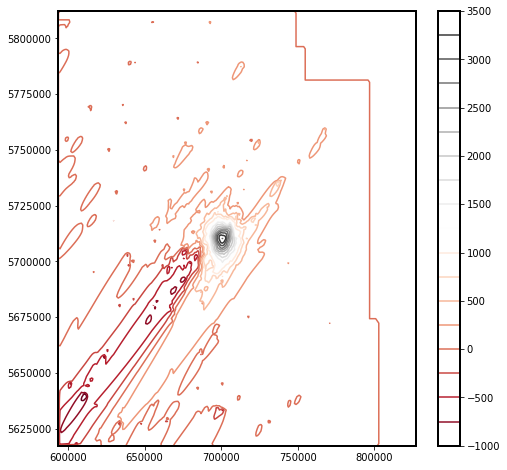

In [74]:
plt.figure(figsize=(8,8))
zzpot2 = np.reshape(p2.values(), newshape=(ny, nx))
plt.contour(x12, x22, zzpot2,20,cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')


In [75]:
p2f=dict()
#go back to the original parametrization once the integration is done
for i in centros:
    aa=(nx-i-1)%nx
    alt=(int((i)/nx))*nx
    
    p2f[i]=p2[aa+alt]
zzpot2f=np.reshape(p2f.values(), newshape=(ny, nx))
#reshape it to the 2d array of the grid

## dx down

In [ ]:
#reload the original p, call it p3, same story from the lower right corner now

In [77]:
px=defaultdict()
py=defaultdict()
for i in centros:
    if p3[i]==0:
        px[i]=0
        py[i]=0

In [78]:
n=len(centros)
cent3=dict()
vect3=dict()
for i in centros:
    aa=(n-i-1)
    alt=(int((i)/n))*n
    
    cent3[aa+alt]=centros[i]
    vect3[aa+alt]=vectorfield[i]


In [79]:

for i in cent3: #start with a point
    if p3[i]!=0: #cause these are already set to be zero
        
                
        nsx=neighs[i][0]
        ndx=neighs[i][1]
        nup=neighs[i][2]
        ndw=neighs[i][3]
        u0=vect3[i][0] 
        v0=vect3[i][1]
        udx=vect3[ndx][0]
        vdx=vect3[ndx][1]
        usx=vect3[nsx][0]
        vsx=vect3[nsx][1]
        vup=vect3[nup][1]
        vdw=vect3[ndw][1]
        
        px[i]=p3[nsx]-1000*u0
        py[i]=(+p3[nup])+v0*1000
        p3[i]=(px[i]+py[i])/2
   

In [80]:
X3=[]
Y3=[]
colormap = cm.hot

for i in cent3:
    X3.append(cent3[i][0])
    Y3.append(cent3[i][1])
    
x13=np.reshape(X3, newshape=(ny, nx))
x23=np.reshape(Y3, newshape=(ny, nx))

(593810.080042, 826810.080042, 5617328.67675, 5812328.67675)

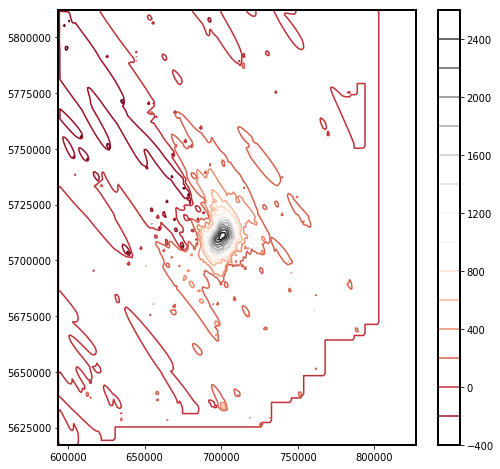

In [81]:
plt.figure(figsize=(8,8))
zzpot3 = np.reshape(p3.values(), newshape=(ny, nx))
plt.contour(x13, x23, zzpot3,20,cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')
#take a look to see if actually you are integrating from that corner

In [82]:
p3f=dict()

for i in centros:
    aa=(n-i-1)
    alt=(int((i)/n))*n
    
    p3f[i]=p3[aa+alt]
zzpot3f=np.reshape(p3f.values(), newshape=(ny, nx))

## sx down

In [83]:
#same story from lower left corner

In [84]:
px=defaultdict()
py=defaultdict()
for i in centros:
    if p4[i]==0:
        px[i]=0
        py[i]=0

In [85]:
n=len(centros)
cent4=dict()
vect4=dict()
#nx n columns, ny n rows
for i in centros:
    aa=(n-(int(i/nx)+1)*nx)+(i%nx)
    
    cent4[aa]=centros[i]
    vect4[aa]=vectorfield[i]


In [86]:

for i in cent4: #start with a point
    if p4[i]!=0: #cause these are already set to be zero
                
        nsx=neighs[i][0]
        ndx=neighs[i][1]
        nup=neighs[i][2]
        ndw=neighs[i][3]
        u0=vect4[i][0] 
        v0=vect4[i][1]
        udx=vect4[ndx][0]
        vdx=vect4[ndx][1]
        usx=vect4[nsx][0]
        vsx=vect4[nsx][1]
        vup=vect4[nup][1]
        vdw=vect4[ndw][1]
        
        px[i]=p4[nsx]+1000*u0
        py[i]=(+p4[nup])+v0*1000
        p4[i]=(px[i]+py[i])/2
   

In [87]:
X4=[]
Y4=[]

colormap = cm.hot

for i in cent4:
    X4.append(cent4[i][0])
    Y4.append(cent4[i][1])
    
x14=np.reshape(X4, newshape=(ny, nx))
x24=np.reshape(Y4, newshape=(ny, nx))

(593810.080042, 826810.080042, 5617328.67675, 5812328.67675)

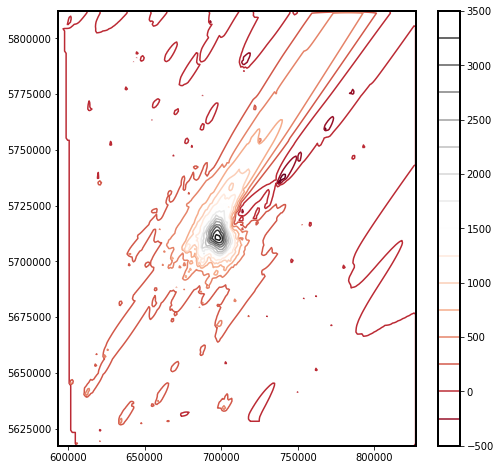

In [88]:
plt.figure(figsize=(8,8))
zzpot4 = np.reshape(p4.values(), newshape=(ny, nx))
plt.contour(x14, x24, zzpot4,20,cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

In [89]:
p4f=dict()

for i in centros:
    aa=(n-(int(i/nx)+1)*nx)+(i%nx)
    
    p4f[i]=p4[aa]
zzpot4f=np.reshape(p4f.values(), newshape=(ny, nx))

In [90]:
ppf=dict()
#now we have four integrated potentials, one per corner
#each one will have a shadow which is the result of the noise in the integration
#let's average them to get rid as much as possible of it
for i in centros:
    ppf[i]=(p[i]+p2f[i]+p3f[i]+p4f[i])/4
    if ppf[i]>0: 
        #i only want to measure and model attractivity 
        #so i don't want to see places far from the city with repulsive potential
        #you can show it anyway by removing this condition
        ppf[i]=ppf[i]
    else: ppf[i]=0

In [ ]:
dd=50000

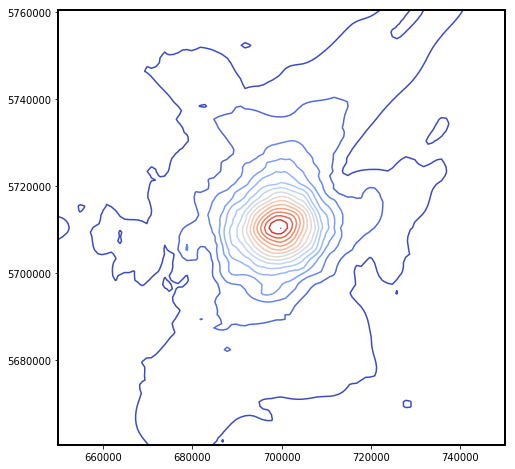

In [234]:
plt.figure(figsize=(8,8))
zzpotf=np.reshape(ppf.values(), newshape=(ny, nx)) #reshape the final potential
plt.contour(x1, x2, zzpotf,20,cmap=cm.coolwarm) #draw equipotential lines
plt.xlim(xa-dd, xa+dd)
plt.ylim(ya-dd, ya+dd)
plt.axis(aspect='image')

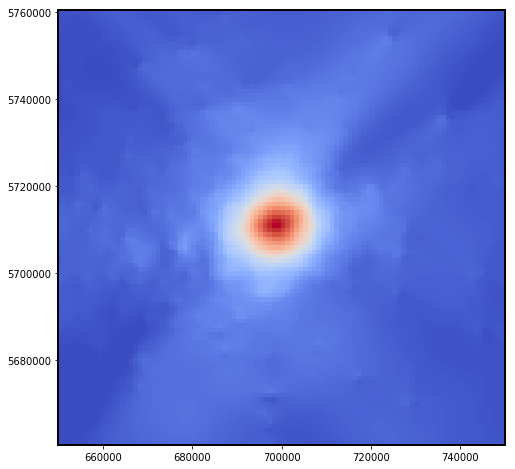

In [245]:
plt.figure(figsize=(8,8))
plt.scatter(X,Y,c=ppf.values(),s=80, marker='s',vmin=0,cmap=cm.coolwarm)

plt.xlim(xa-dd, xa+dd)
plt.ylim(ya-dd, ya+dd)
plt.axis(aspect='image')

In [92]:
dd=50000

In [93]:
mpl.rcParams['grid.linewidth'] = 1

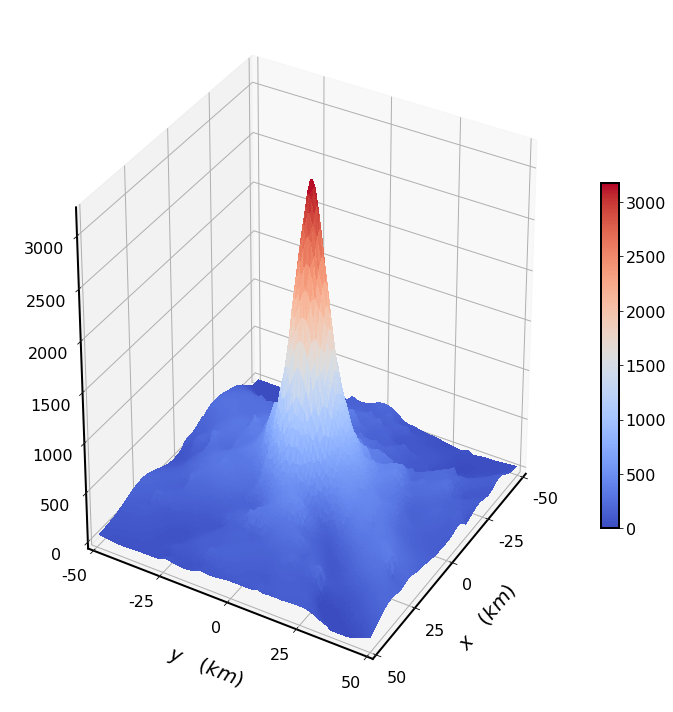

In [94]:
ppff=[]
xff=[]
yff=[]
for i in centros: #i want to plot only the potential in a certain space range
    if any([centros[i][0] < xa-dd,centros[i][0] > xa+dd,centros[i][1] < ya-dd,centros[i][1] > ya+dd]):
        pass
    
    else:
        xff.append(centros[i][0])
        yff.append(centros[i][1])
        ppff.append(ppf[i])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf=ax.plot_trisurf(xff, yff, ppff,cmap=cm.coolwarm,antialiased=False)

plt.ylabel('$y \quad(km)$', fontsize='20',labelpad=20)
plt.xlabel('$x \quad(km)$',fontsize='20',labelpad=20)
cbar=fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.01)

plt.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16) 
plt.xticks(ha='left')
plt.yticks(ha='right')
xlocs=asarray(linspace(xa-dd, xa+dd, 5))
ylocs=asarray(linspace(ya-dd, ya+dd, 5))

xticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(round((x-xa)/1000)))
yticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(round((x-ya)/1000)))
ax.xaxis.set_major_formatter(xticks)
ax.yaxis.set_major_formatter(yticks)
plt.xticks(xlocs)
plt.yticks(ylocs)
ax.set_xlim3d(xa-dd, xa+dd)
ax.set_ylim3d(ya-dd, ya+dd)
ax.set_zlim(0)
ax.tick_params(axis='z', which='major', pad=15)

ax.view_init(30, 30)
fig.tight_layout()

